In [ ]:
#pip install libemg

In [ ]:
#pip install pandas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scipyio
import seaborn as sns
import pandas as pd
from google.colab import drive
import os

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
gestures_label = {
	 'Ball' : 0,
	 'Ind' : 1,
	 'LRMI' : 2,
	 'Th' : 3,
	 'ThInd' : 4,
	 'ThIndMid' : 5,
}

gestures = ['Ball', 'Ind', 'LRMI', 'Th', 'ThInd', 'ThIndMid']

In [ ]:

persons = ["A1_Force Exp", "A2_Force Exp", "A3_Force Exp", "A4_Force Exp", "A5_Force Exp", "A6_Force Exp", "A7_Force Exp", "A8_Force Exp","A9_Force Exp"]
#persons = ["A1_Force Exp"]

In [ ]:
force_levels = ["Ball", "Ind", "LRMI", "Th","ThInd", "ThIndMid",]

In [ ]:

def get_gesture_label(filename,input_string, gestures):
    gesture = max((gesture for gesture in gestures if gesture in filename), key=len, default=None)
    #print(filename, gesture, gestures_label[gesture])
    return gestures_label[gesture]




In [ ]:

def read_dataset(root_datapath, persons, force_level):
  x = []
  y = []
  for person in persons:
    count = 0
    for force in force_levels:
      person_folder_path = root_datapath + "/" + person + "/" + force_level + "/" + force+'_'+force_level.lower()
      #print(person_folder_path)
      for root, dirs, files in os.walk(person_folder_path, topdown=False):
        for file in files:
            count = count + 1
            matdata = scipyio.loadmat(os.path.join(person_folder_path, file))
            last_key = list(matdata.keys())[-1]
            last_value = matdata[last_key]
            x.append(last_value)
            #print(file, get_gesture_label(file, gestures, gestures_label))
            y.append(get_gesture_label(file, gestures, gestures_label))
    print(person + f" : {count}")
  x = np.array(x)
  y = np.array(y)
  return x, y

In [ ]:

filepath = "/content/gdrive/MyDrive/TNSRE paper EMG dataset"

In [ ]:
# rest_x, rest_y = read_dataset(filepath, persons, "Rest")
# pronation_x, pronation_y = read_dataset(filepath, persons, "Pronation")
high_x, high_y = read_dataset(filepath, persons, "High")


A1_Force Exp : 30
A2_Force Exp : 42
A3_Force Exp : 34
A4_Force Exp : 30
A5_Force Exp : 31
A6_Force Exp : 36
A7_Force Exp : 39
A8_Force Exp : 47
A9_Force Exp : 44


<ipython-input-14-f8d1cdb90881>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x)


In [ ]:
# matdata = scipyio.loadmat("/content/gdrive/MyDrive/TNSRE paper EMG dataset/A1_Force Exp/High/Ball_high/A1_Ball_high_t3.mat")
# last_key = list(matdata.keys())[-1]
# print(matdata[last_key])

In [ ]:

#print(rest_x.shape, rest_y.shape)
print(high_x.shape, high_y.shape)
#print(pronation_x.shape, pronation_y.shape)

(333,) (333,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    high_x,high_y,
    test_size = .2, shuffle=True, random_state=0
)


In [ ]:

x_train.shape


(266,)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Assuming high_x and high_y are your input and target arrays
# Replace the following lines with your actual data
high_x = np.random.rand(333, 8000)  # Assuming 8000 features per data point
high_y = np.random.randint(6, size=333)  # Assuming 6 classes (gestures)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(high_x, high_y, test_size=0.2, random_state=42)

# Build a simple ANN model
model = models.Sequential([
    layers.Flatten(input_shape=(8000,)),  # Flatten layer for reshaping the input
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(6, activation='softmax')  # Using softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/15
9/9 [==============================] - 1s 34ms/step - loss: 2.4360 - accuracy: 0.1353 - val_loss: 2.1433 - val_accuracy: 0.1940
Epoch 2/15
9/9 [==============================] - 0s 13ms/step - loss: 2.1241 - accuracy: 0.2105 - val_loss: 1.8866 - val_accuracy: 0.1343
Epoch 3/15
9/9 [==============================] - 0s 16ms/step - loss: 1.8211 - accuracy: 0.2406 - val_loss: 1.8299 - val_accuracy: 0.2090
Epoch 4/15
9/9 [==============================] - 0s 12ms/step - loss: 1.7845 - accuracy: 0.2030 - val_loss: 1.8669 - val_accuracy: 0.1045
Epoch 5/15
9/9 [==============================] - 0s 13ms/step - loss: 1.7482 - accuracy: 0.2481 - val_loss: 1.8152 - val_accuracy: 0.1642
Epoch 6/15
9/9 [==============================] - 0s 13ms/step - loss: 1.7471 - accuracy: 0.2218 - val_loss: 1.8408 - val_accuracy: 0.1045
Epoch 7/15
9/9 [==============================] - 0s 13ms/step - loss: 1.7623 - accuracy: 0.2143 - val_loss: 1.7885 - val_accuracy: 0.1343
Epoch 8/15
9/9 [===========

In [ ]:


# Evaluate the model on the test set
eval_results = model.evaluate(x_test, y_test)

# Print the evaluation results
print(f"Test Loss: {eval_results[0]}")
print(f"Test Accuracy: {eval_results[1]}")


3/3 [==============================] - 0s 8ms/step - loss: 1.8025 - accuracy: 0.2090
Test Loss: 1.8024526834487915
Test Accuracy: 0.20895522832870483


In [ ]:
model.evaluate(high_x, high_y)

11/11 [==============================] - 0s 10ms/step - loss: 1.6017 - accuracy: 0.3814


[1.6017112731933594, 0.38138139247894287]

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have already trained the model, and now you want to generate a classification report
# (Make sure to replace x_test and y_test with your actual test data)

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_test, y_pred_classes))


3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.29      0.67      0.40        15
           1       0.00      0.00      0.00        13
           2       0.12      0.33      0.17         9
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         7
           5       0.17      0.10      0.12        10

    accuracy                           0.21        67
   macro avg       0.09      0.18      0.12        67
weighted avg       0.10      0.21      0.13        67



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/100
9/9 [==============================] - 0s 39ms/step - loss: 0.9803 - accuracy: 0.6090 - val_loss: 2.1502 - val_accuracy: 0.1642
Epoch 2/100
9/9 [==============================] - 0s 29ms/step - loss: 1.0178 - accuracy: 0.6316 - val_loss: 2.2404 - val_accuracy: 0.1642
Epoch 3/100
9/9 [==============================] - 0s 29ms/step - loss: 0.9668 - accuracy: 0.5752 - val_loss: 2.1945 - val_accuracy: 0.1642
Epoch 4/100
9/9 [==============================] - 0s 20ms/step - loss: 0.9897 - accuracy: 0.5414 - val_loss: 2.1000 - val_accuracy: 0.1791
Epoch 5/100
9/9 [==============================] - 0s 19ms/step - loss: 0.9710 - accuracy: 0.5789 - val_loss: 1.9814 - val_accuracy: 0.1045
Epoch 6/100
9/9 [==============================] - 0s 21ms/step - loss: 0.9023 - accuracy: 0.5940 - val_loss: 2.1149 - val_accuracy: 0.1791
Epoch 7/100
9/9 [==============================] - 0s 35ms/step - loss: 0.9406 - accuracy: 0.6541 - val_loss: 2.0023 - val_accuracy: 0.1194
Epoch 8/100
9/9 [===

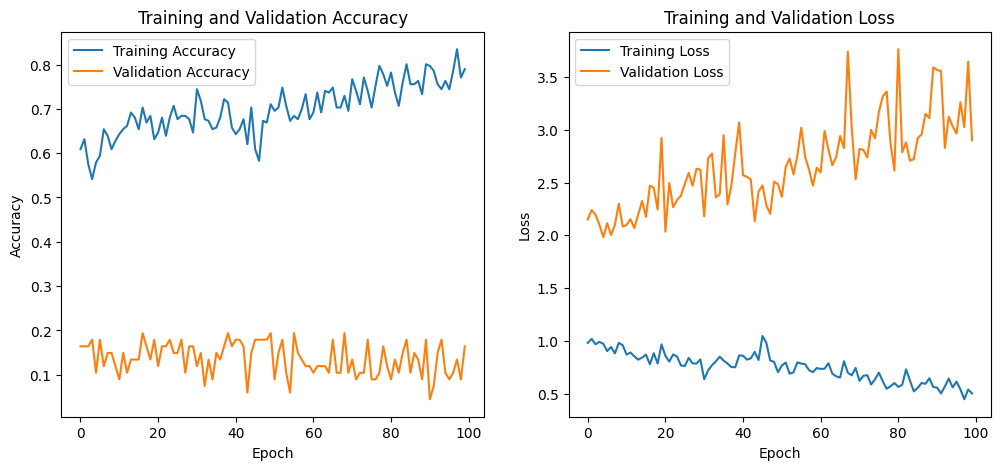

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already trained the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
